# Introduction

In machine learning, we often evaluate the performance of a classification model using a score. However, we also need to test the significance of the score to ensure that the model performance is not just by chance. This is where permutation test score comes in handy. It generates a null distribution by calculating the accuracy of the classifier on 1000 different permutations of the dataset. An empirical p-value is then calculated as the percentage of permutations for which the score obtained is greater than the score obtained using the original data. In this lab, we will use the **permutation_test_score** function from **sklearn.model_selection** to evaluate the significance of a cross-validated score using permutations.

# Load the dataset and generate random features

We will use the iris dataset, which consists of measurements taken from 3 types of irises, and generate some random feature data (i.e., 20 features), uncorrelated with the class labels in the iris dataset.

In [1]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

n_uncorrelated_features = 20
rng = np.random.RandomState(42)
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

# Permutation Test Score on the Original Data

Next, we calculate the **permutation_test_score** using the original iris dataset and the **SVC** classifier with **accuracy** score to evaluate the model at each round.

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

clf = SVC(kernel="linear", random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=1000
)

# Permutation Test Score on Random Data

Next, we calculate the **permutation_test_score** using the randomly generated features and iris labels, which should have no dependency between features and labels.

In [4]:
score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(
    clf, X_rand, y, scoring="accuracy", cv=cv, n_permutations=1000
)

# Plot the Results

We plot a histogram of the permutation scores (the null distribution) for both the original iris dataset and the randomized data. We also indicate the score obtained by the classifier on the original data using a red line. The p-value is displayed on each graph.

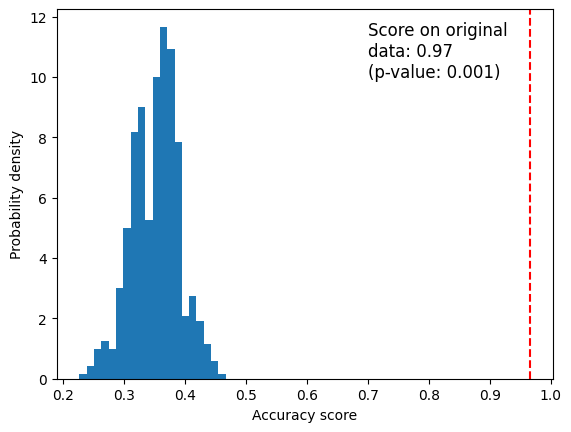

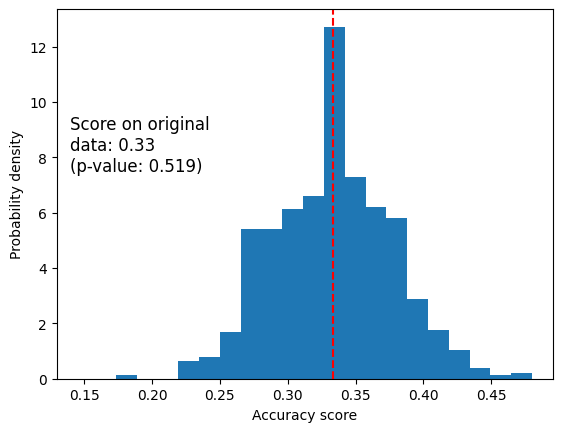

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Original data
ax.hist(perm_scores_iris, bins=20, density=True)
ax.axvline(score_iris, ls="--", color="r")
score_label = f"Score on original\ndata: {score_iris:.2f}\n(p-value: {pvalue_iris:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability density")

plt.show()

fig, ax = plt.subplots()

# Random data
ax.hist(perm_scores_rand, bins=20, density=True)
ax.set_xlim(0.13)
ax.axvline(score_rand, ls="--", color="r")
score_label = f"Score on original\ndata: {score_rand:.2f}\n(p-value: {pvalue_rand:.3f})"
ax.text(0.14, 7.5, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability density")

plt.show()

# Summary

In this lab, we learned how to use the **permutation_test_score** function from **sklearn.model_selection** to evaluate the significance of a cross-validated score using permutations. We generated a null distribution by calculating the accuracy of the classifier on 1000 different permutations of the dataset, and calculated an empirical p-value as the percentage of permutations for which the score obtained is greater than the score obtained using the original data. We also plotted the results to visualize the null distribution and the score obtained on the original data.